In [12]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
# Hide warnings
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore")
# Reading CSV file into training set
# read data from csv file
lower_data = pd.read_csv("df_lower_alldata.csv").fillna(0).iloc[:,-1].values
raise_data = pd.read_csv("df_raise_alldata.csv").fillna(0).iloc[:,-1].values
lenlow=len(lower_data)
lenraise=len(raise_data)


In [13]:
p=60

In [14]:
lower_data

array([0.020234, 0.126083, 0.090646, ..., 0.661132, 0.175711, 0.229735])

In [9]:
title=[]
for i in range(p):
    title.append('throughput ratio'+str(60-i)+'timestep ago')
title.append('current throughput ratio')
lower_set=pd.DataFrame(columns=title) 
raise_set=pd.DataFrame(columns=title) 

In [17]:
for i in range(p+1):
    lower_set.iloc[:,i]=lower_data[i:lenlow-(p+1)+i].tolist()
    raise_set.iloc[:,i]=raise_data[i:lenraise-(p+1)+i].tolist()

In [44]:
train_lower , test_lower = train_test_split(lower_set, shuffle=False)
train_raise , test_raise = train_test_split(raise_set, shuffle=False)
x_train_lower=np.reshape(np.array(train_lower.iloc[:,:p]),(len(train_lower),p,1))
x_train_raise=np.reshape(np.array(train_raise.iloc[:,:p]),(len(train_raise),p,1))
x_test_lower=np.reshape(np.array(test_lower.iloc[:,:p]),(len(test_lower),p,1))
x_test_raise=np.reshape(np.array(test_raise.iloc[:,:p]),(len(test_raise),p,1))
y_train_lower=np.array(train_lower.iloc[:,-1])
y_train_raise=np.array(train_raise.iloc[:,-1])
y_test_lower=np.array(test_lower.iloc[:,-1])
y_test_raise=np.array(test_raise.iloc[:,-1])

In [23]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

Using TensorFlow backend.


In [56]:
# Initializing the Recurrent Neural Network
regressor1 = Sequential()
# Adding the input layer and the LSTM layer
regressor1.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# Adding the output layer
regressor1.add(Dense(units = 1))
# Compiling the Recurrent Neural Network
regressor1.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the Recurrent Neural Network to the Training set
regressor1.fit(x_train_lower, y_train_lower, batch_size = 32, epochs = 20,verbose=0)

In [57]:
# Initializing the Recurrent Neural Network
regressor2 = Sequential()
# Adding the input layer and the LSTM layer
regressor2.add(LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)))
# Adding the output layer
regressor2.add(Dense(units = 1))
# Compiling the Recurrent Neural Network
regressor2.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the Recurrent Neural Network to the Training set
regressor2.fit(x_train_raise, y_train_raise, batch_size = 32, epochs = 20,verbose=0)

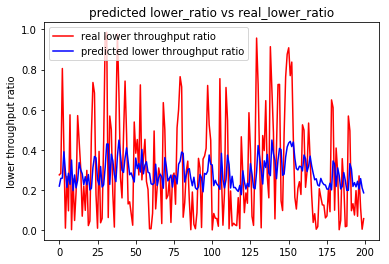

In [58]:
y_test_lower_pred=regressor1.predict(x_test_lower)
# Visualizing the results
num=200;
import matplotlib.pyplot as plt
fig1 = plt.figure()
plt.plot(y_test_lower[:num], color = 'red', label = 'real lower throughput ratio')
plt.plot(y_test_lower_pred[:num], color = 'blue', label = 'predicted lower throughput ratio')
plt.title('predicted lower_ratio vs real_lower_ratio')
plt.ylabel('lower throughput ratio')
plt.legend()
plt.show()
fig1.savefig('lower throughpupt ratio'+'.png')

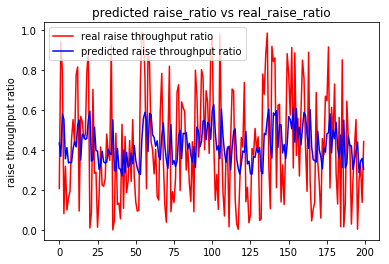

In [59]:
y_test_raise_pred=regressor2.predict(x_test_raise)
# Visualizing the results
num=200;
import matplotlib.pyplot as plt
fig2 = plt.figure()
plt.plot(y_test_raise[:num], color = 'red', label = 'real raise throughput ratio')
plt.plot(y_test_raise_pred[:num], color = 'blue', label = 'predicted raise throughput ratio')
plt.title('predicted raise_ratio vs real_raise_ratio')
plt.ylabel('raise throughput ratio')
plt.legend()
plt.show()
fig2.savefig('raise throughpupt ratio'+'.png')